# K vecinos más cercanos o KNN

Claseificación supervisada, estima que 'x' pertenece a 'C' con información

Se usa para clasificar objetos con ejemplos cercanos

Es fácil de entrenar y trabajar

## Funcionamiento

Toma los elementos más cercanos y predice a que pertenece en función a eso

# Ejercicio

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
cd data_sets

[WinError 2] El sistema no puede encontrar el archivo especificado: 'data_sets'
e:\Sergio\Documentos\Programacion\Python\Udemy Machine Free\data_sets


In [6]:
dataframe = pd.read_csv('vehiculos.csv')

In [8]:
dataframe.head()

,compactness,circularity,distance_circularity,radius_ratio,pr_axis_aspect_ratio,max_length_aspect_ratio,scatter_ratio,elongatedness,pr_axis_rectangularity,max_length_rectangularity,scaled_variance_major_axis,scaled_variance_minor_axis,scaled_radius_gyration,skewness_major_axis,skewness_minor_axis,kurtosis_minor_axis,kurtosis_major_axis,hollows_ratio,vehicle_class
0,95.0,48.0,83.0,178.0,72.0,10.0,162.0,42.0,20.0,159.0,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197.0,van
1,91.0,41.0,84.0,141.0,57.0,9.0,149.0,45.0,19.0,143.0,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199.0,van
2,104.0,50.0,106.0,209.0,66.0,10.0,207.0,32.0,23.0,158.0,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196.0,saab
3,93.0,41.0,82.0,159.0,63.0,9.0,144.0,46.0,19.0,143.0,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207.0,van
4,85.0,44.0,70.0,205.0,103.0,52.0,149.0,45.0,19.0,144.0,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183.0,bus


In [10]:
dataframe['vehicle_class'].unique()

array(['van', 'saab', 'bus', 'opel'], dtype=object)

In [12]:
y = dataframe['vehicle_class']
X = dataframe.drop('vehicle_class',axis=1)

In [14]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=45)

In [18]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [20]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [22]:
predicciones = knn.predict(X_test)

In [24]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test,predicciones))

[[65  0  7  5]
 [ 7 24 28  6]
 [ 5 26 23  3]
 [ 2  0  2 51]]


In [26]:
print(classification_report(y_test,predicciones))

              precision    recall  f1-score   support

         bus       0.82      0.84      0.83        77
        opel       0.48      0.37      0.42        65
        saab       0.38      0.40      0.39        57
         van       0.78      0.93      0.85        55

    accuracy                           0.64       254
   macro avg       0.62      0.64      0.62       254
weighted avg       0.63      0.64      0.63       254



In [28]:
#Hacer un sistema más preciso
tasa_error=[]
for i in range(1,30):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    prediccion_i = knn.predict(X_test)
    tasa_error.append(np.mean(prediccion_i != y_test))

In [30]:
tasa_error

[0.35826771653543305,
 0.3464566929133858,
 0.3188976377952756,
 0.3228346456692913,
 0.33858267716535434,
 0.3346456692913386,
 0.3228346456692913,
 0.33858267716535434,
 0.36220472440944884,
 0.3661417322834646,
 0.35039370078740156,
 0.3661417322834646,
 0.36220472440944884,
 0.38188976377952755,
 0.35039370078740156,
 0.3661417322834646,
 0.3661417322834646,
 0.3700787401574803,
 0.3661417322834646,
 0.3779527559055118,
 0.3661417322834646,
 0.37401574803149606,
 0.37401574803149606,
 0.37401574803149606,
 0.3779527559055118,
 0.38976377952755903,
 0.38188976377952755,
 0.3700787401574803,
 0.37401574803149606]

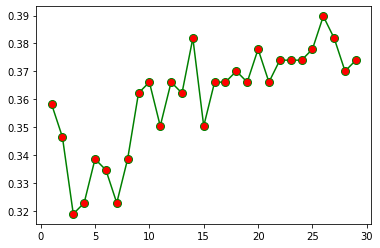

In [32]:
valores = range(1,30)
plt.plot(valores,tasa_error,color='green',marker='o',markerfacecolor='red',markersize=8)

In [34]:
i = 3
knn=KNeighborsClassifier(n_neighbors=i)
knn.fit(X_train,y_train)
prediccion = knn.predict(X_test)

In [36]:
print(classification_report(y_test,predicciones))

              precision    recall  f1-score   support

         bus       0.82      0.84      0.83        77
        opel       0.48      0.37      0.42        65
        saab       0.38      0.40      0.39        57
         van       0.78      0.93      0.85        55

    accuracy                           0.64       254
   macro avg       0.62      0.64      0.62       254
weighted avg       0.63      0.64      0.63       254

